# PTC Covariances

This shows the difference between the parallel (0,1) turnoff and the serial (1,0) turnoff.
The code to generate the eotest file can be found here: https://github.com/lsst-camera-dh/eotest/blob/594625ba31db62a75ed802da8d90ba2dc19a71e8/python/lsst/eotest/sensor/BFTask.py

In [1]:
! eups list -s | grep lsst_distrib

lsst_distrib          g4213664e8e+0dcb05a918 	current w_2023_47 setup


In [5]:
import matplotlib.gridspec as gridspec
from lsst.daf.butler import Butler
from lsst.obs.lsst import LsstCam
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
import numpy as np
import numpy as numpy
import matplotlib
from astropy.io import fits
from matplotlib import colormaps

matplotlib.rcParams.update({'font.size': 13})
plt.style.use('tableau-colorblind10')

# Set up some plotting defaults:

params = {'axes.labelsize': 13,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.major.width': 1.5,
          'xtick.minor.width': 1,
          'xtick.major.size': 6,
          'xtick.minor.size': 3,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 1.5,
          'axes.linewidth': 1.5,
          'axes.labelweight': 1.5,
          'axes.titleweight': 1.5,
          'ytick.major.width': 1.5,
          'ytick.minor.width': 1,
          'ytick.major.size': 6,
          'ytick.minor.size': 3,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [8, 8],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

In [6]:
butler = Butler("/repo/ir2")

0.0
0.16666666666666666
0.3333333333333333
0.5
0.6666666666666666
0.8333333333333334


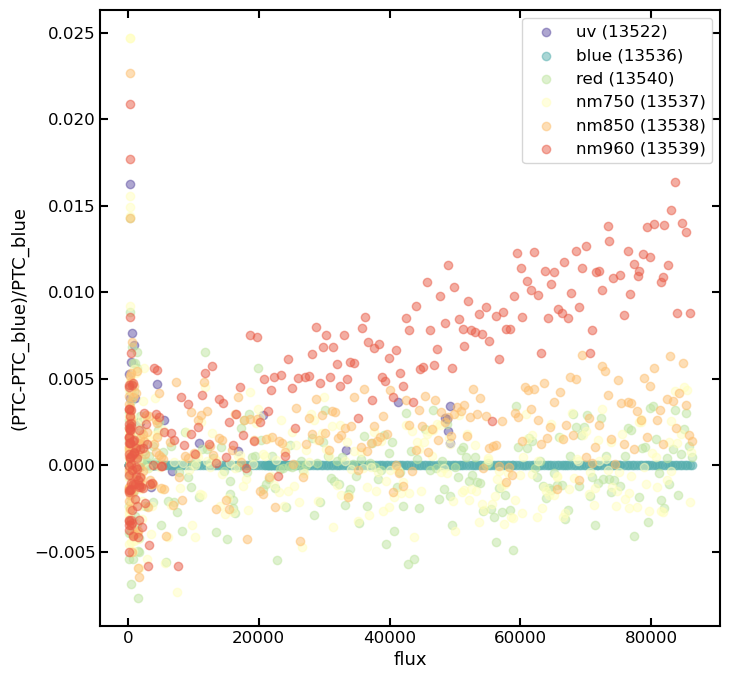

In [7]:
# blue  13536
# red   13540
# nm960 13539
# nm850 13538
# nm750 13537
# Dense_Log_PTC 13558

amp='C10'
detector=23
blue=butler.get('ptc', instrument='LSSTCam', detector=detector, collections='u/lsstccs/ptc_13536_w_2023_41')
fblue=lambda x: numpy.interp( x, blue.finalMeans[amp], blue.finalVars[amp])

runs = [
    ( "uv", 13522 ),
    ( "blue", 13536 ),
    ( "red",  13540 ),
    ( "nm750", 13537 ),
    ( "nm850", 13538 ),    
    ( "nm960", 13539 ),
#    ( "Dense_Log_PTC", 13558 ),    
    ]

for i, ( label, run ) in enumerate(runs):
    ptc=butler.get('ptc', instrument='LSSTCam', detector=detector, collections=f'u/lsstccs/ptc_{run}_w_2023_41')

    print(i/len(runs))
    
    pylab.scatter(ptc.finalMeans[amp], (ptc.finalVars[amp]-fblue(ptc.finalMeans[amp]))/fblue(ptc.finalMeans[amp]), color=colormaps['Spectral_r'](i/len(runs)), label=f"{label} ({run})", alpha=0.5 )
pylab.xlabel('flux')
pylab.ylabel('(PTC-PTC_blue)/PTC_blue')
#pylab.semilogx()
pylab.legend()

In [11]:
ptc = blue

AMP="C00"
mu = ptc.rawMeans[AMP]
g = ptc.gain[AMP]
expIdMask = ptc.expIdMask[AMP]
c00 = ptc.rawVars[AMP]
c00_model = ptc.covariancesModel[AMP][:,0,0]
expmask = ptc.expIdMask[AMP]
n = ptc.noiseMatrix[AMP][0,0]
n = ptc.noise[AMP]
a = ptc.aMatrix[AMP]

r = (c00 / mu**2) - (mu/g + n/g**2)/(mu**2)
r_model = (c00_model / mu**2) - (mu/g + n/g**2)/(mu**2)

Text(0, 0.5, '$C_{00}/\\mu^2 - (\\mu/g + n_{00}/g^{2})/\\mu^2$')

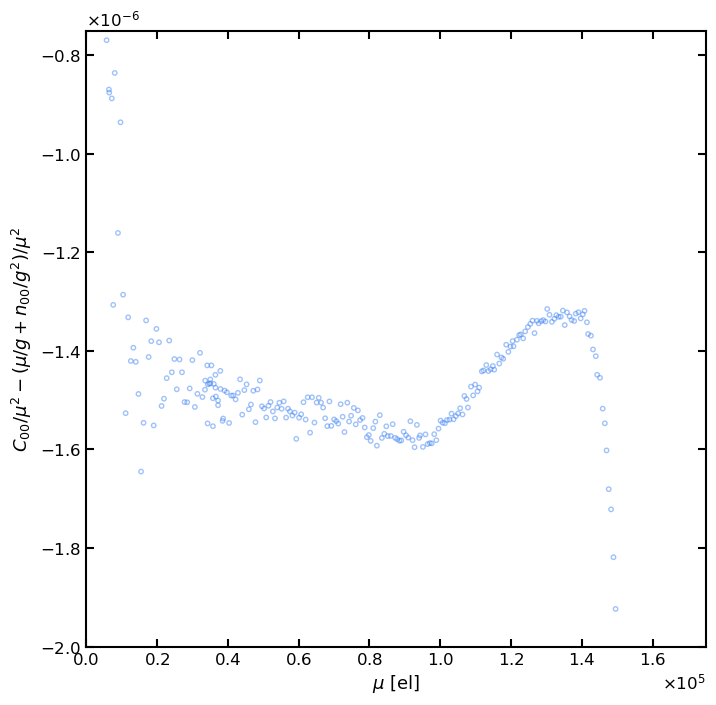

In [14]:
plt.scatter(mu*g,r, marker="o", edgecolor="#4285F4", s=10,  facecolor="None", label="135211 (blue)", alpha=0.5)
plt.plot(mu[expIdMask]*g,r_model[expIdMask], "o-", ms=0, c="#4285F4")
plt.axhline(a[0,0], linestyle="--", color="k")

plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0), useMathText=True)
plt.ylim(-2.0e-6,-.75e-6)
plt.xlim(0,1.75e5)
plt.xlabel(r"$\mu$ [el]")
plt.ylabel("$C_{00}/\mu^2 - (\mu/g + n_{00}/g^{2})/\mu^2$")

In [15]:
g

1.7468216259240237

In [28]:
for i, ( label, run ) in enumerate(runs):
    ptc=butler.get('ptc', instrument='LSSTCam', detector=detector, collections=f'u/lsstccs/ptc_{run}_w_2023_41')

    print(run, label, np.count_nonzero(ptc.expIdMask['C00']), len(ptc.expIdMask['C00']))

13522 uv 29 30
13536 blue 310 417
13540 red 268 393
13537 nm750 302 413
13538 nm850 269 413
13539 nm960 250 406


In [29]:
ptc=butler.get('ptc', instrument='LSSTCam', detector=23, collections='u/abrought/ptc.13511.DM-41754_and_DM-41681.withCTI')

MissingCollectionError: No collection with name 'u/abrought/ptc.13511.DM-41754_and_DM-41681.withCTI' found.

In [30]:
raw = butler.get("raw", instrument="LSSTCam",detector=23,exposure=2023110500904, collections='LSSTCam/raw/all')



In [31]:
raw.getBBox()

Box2I(corner=Point2I(0, 0), dimensions=Extent2I(4608, 4096))

[]

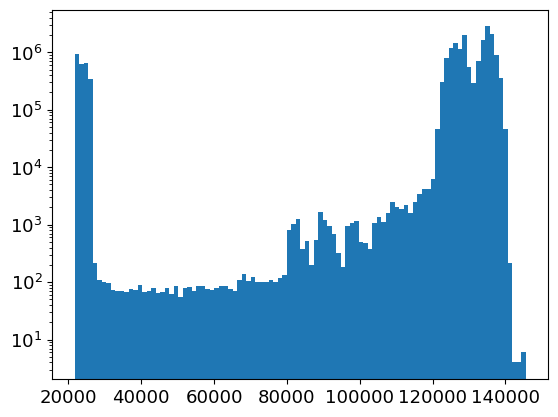

In [32]:
import matplotlib.pyplot as plt
plt.hist(raw.image.array.ravel(), bins=100)
plt.semilogy()

In [34]:
badraw = butler.get("raw", instrument="LSSTCam",detector=23,exposure=2023110500904, collections='LSSTCam/raw/all')


In [35]:
goodraw = butler.get("raw", instrument="LSSTCam",detector=23,exposure=2023110500015, collections='LSSTCam/raw/all')



[]

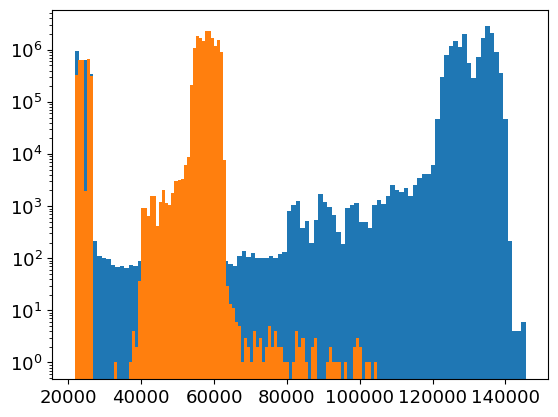

In [36]:
import matplotlib.pyplot as plt
plt.hist(badraw.image.array.ravel(), bins=100, label="bad")
plt.hist(goodraw.image.array.ravel(), bins=100, label="good")
plt.semilogy()